In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# CSV 파일 읽기
autoDF = pd.read_csv('../../Data/auto_mpg.csv')


# 데이터 크기 출력
print('autompg 데이터셋 크기:', autoDF.shape)

# 데이터프레임 출력 
autoDF.head()


autompg 데이터셋 크기: (398, 9)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [6]:
autoDF.drop(columns=['car name'], inplace=True)

In [7]:
autoDF['horsepower'] = autoDF['horsepower'].replace('?', np.nan).astype(float)

In [8]:
autoDF.dropna(inplace=True)

In [9]:
# 독립 변수(X)와 종속 변수(y) 설정
X = autoDF.drop(columns=['mpg'])  # 독립 변수 (입력 데이터)
y = autoDF['mpg']  # 종속 변수 (예측 대상)

In [10]:
# 훈련 데이터와 테스트 데이터 분할 (70% 훈련, 30% 테스트)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [11]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [12]:
y_preds = lr_model.predict(X_test)

In [13]:
# 8. 성능 평가
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_preds)


In [14]:
# 결과 출력
print(f'MSE: {mse:.3f}')
print(f'RMSE: {rmse:.3f}')
print(f'R^2 Score: {r2:.3f}')

MSE: 10.066
RMSE: 3.173
R^2 Score: 0.810


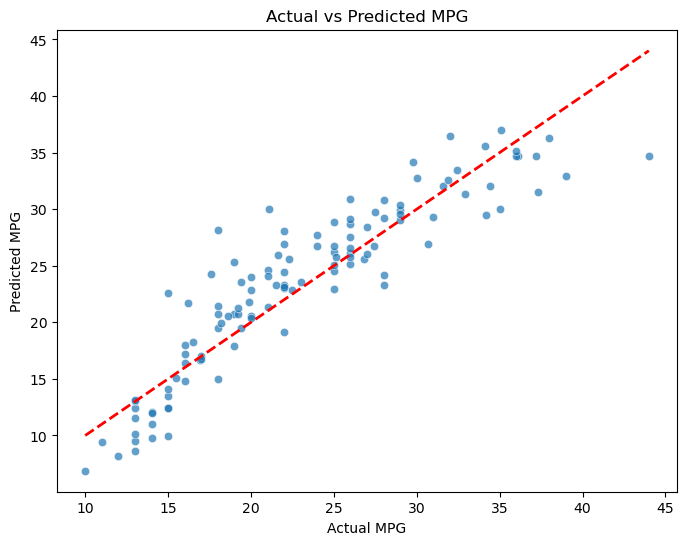

In [15]:

# 시각화: 실제 vs 예측
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_preds, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', lw=2)
plt.xlabel("Actual MPG")
plt.ylabel("Predicted MPG")
plt.title("Actual vs Predicted MPG")
plt.show()


In [16]:
# 검증
cross_val_scores = cross_val_score(lr_model, X, y, cv=5, scoring='r2')
mean_cv_score = np.mean(cross_val_scores)


In [17]:
cross_val_scores

array([0.55691895, 0.68950582, 0.82212138, 0.6795006 , 0.2250594 ])

In [18]:
mean_cv_score

np.float64(0.5946212315010341)